# 生成数组的函数

## arange

`arange(start, stop=None, step=1, dtype=None)`
产生一个在区间 `[start, stop) `之间，以 `step` 为间隔的数组，如果只输入一个参数，则默认从 0 开始，并以这个值为结束：



In [1]:
import numpy as np
np.arange(4)

array([0, 1, 2, 3])

In [2]:
# 与 range 不同， arange 允许非整数值输入，产生一个非整型的数组：
np.arange(0,2*np.pi,np.pi/4)

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714])

In [3]:
# 指定类型
np.arange(0, 2 * np.pi, np.pi / 4, dtype=np.float32)

array([0.       , 0.7853982, 1.5707964, 2.3561945, 3.1415927, 3.926991 ,
       4.712389 , 5.4977875], dtype=float32)

In [4]:
# stop 的值 2.1 出现在了数组中，所以使用浮点数的时候需要注意。
np.arange(1.5, 2.1, 0.3)

array([1.5, 1.8, 2.1])

## linspace

`linspace(start, stop, N)`,产生 N 个等距分布在 `[start, stop]`间的元素组成的数组，包括 `start, stop`。

In [6]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

## logspace

`logspace(start, stop, N)`产生 N 个对数等距分布的数组，默认以10为底：

In [9]:
np.logspace(0,1,5)

array([ 1.        ,  1.77827941,  3.16227766,  5.62341325, 10.        ])

即：$$[10^0,10^{0.25},10^{0.5},10^{0.75},10^1]$$

## meshgrid

In [10]:
# 在二维平面中生成一个网格，这时候可以使用 meshgrid 来完成这样的工作：
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

x, y = np.meshgrid(x_ticks, y_ticks)

In [11]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ]])

In [12]:
y

array([[-1. , -1. , -1. , -1. , -1. ],
       [-0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

d:\python\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,0,'z')

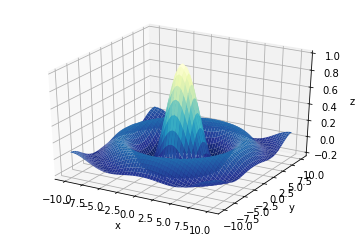

In [14]:
# x 对应网格的第一维，y 对应网格的第二维。
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x, y):
    # sinc 函数
    r = np.sqrt(x ** 2 + y ** 2)
    result = np.sin(r) / r
    result[r == 0] = 1.0  
    # 这个需要学习一下，result作为一个返回值的列表，如果r==0，则其值为1.0
    return result

x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [15]:
# 事实上，x, y 中有很多冗余的元素，这里提供了一个 sparse 的选项：
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)

In [16]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ]])

In [17]:
y

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ]])

d:\python\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,0,'z')

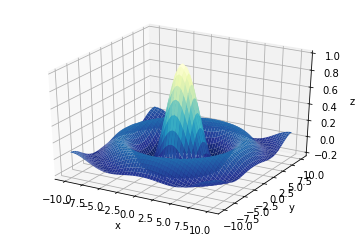

In [20]:
# x, y 变成了单一的行向量和列向量，不影响结果
x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks,sparse=True)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

meshgrid 可以设置轴排列的先后顺序：

* 默认为 indexing='xy' 即笛卡尔坐标，对于2维数组，返回行向量 x 和列向量 y
* 或者使用 indexing='ij' 即矩阵坐标，对于2维数组，返回列向量 x 和行向量 y。

## ogrid , mgrid

* `ogrid` 相当于 `meshgrid(indexing='ij', sparse=True)`
* `mgrid` 相当于 `meshgrid(indexing='ij', sparse=False)`

In [21]:
x, y = np.ogrid[-1:1:.5, -1:1:.5]

In [22]:
x

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5]])

In [23]:
y

array([[-1. , -0.5,  0. ,  0.5]])

* Numpy 使用的是 `start:end:step` 的表示,这里的结果不包括 end 的值

In [24]:
# 为了包含 end 的值，我们可以使用这样的技巧：
x, y = np.ogrid[-1:1:5j, -1:1:5j]
# 传入一个复数 5j ，表示我们需要一个 5 个值的数组

d:\python\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,0,'z')

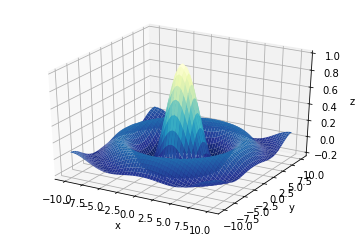

In [25]:
# x,y交换是因为这个函数生成的时候和之前刚好相反
y, x = np.ogrid[-10:10:51j, -10:10:51j]

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## `r_ , c_`

In [26]:
# r_ / c_ 来产生行向量或者列向量
np.r_[0:1:0.1]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [27]:
# 或者这样
# 复数步长制定数组长度：
np.r_[0:1:5j]

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [28]:
# 连接多个序列，产生数组：
# 看到没有，里面的序列类型不一样
np.r_[(3,22,11), 4.0, [15, 6]]

array([ 3., 22., 11.,  4., 15.,  6.])

In [29]:
# 列向量
np.c_[1:3:5j]

array([[1. ],
       [1.5],
       [2. ],
       [2.5],
       [3. ]])

## ones，zeros

```
ones(shape, dtype=float64)
zeros(shape, dtype=float64)
```
产生一个制定形状的全 0 或全 1 的数组，还可以制定数组类型

In [30]:
np.zeros(3)

array([0., 0., 0.])

In [31]:
np.ones([2,3],dtype=np.float32)

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [33]:
np.ones([2,3])*5

array([[5., 5., 5.],
       [5., 5., 5.]])

## empty

```
empty(shape, dtype=float64, order='C')

```
使用 empty 方法产生一个制定大小的数组（数组所指向的内存未被初始化，所以**值随机**），再用 fill 方法填充：

In [34]:
a = np.empty(2)
a

array([6., 4.])

In [35]:
a.fill(5)
a

array([5., 5.])

In [36]:
# 这种方法慢一点
a[:]=5
a

array([5., 5.])

## `empty_like, ones_like, zeros_like`

In [37]:
# 产生一个跟 a 大小一样，类型一样的对应数组。
a = np.arange(0,10,2.5)
a

array([0. , 2.5, 5. , 7.5])

In [38]:
np.empty_like(a)

array([0. , 2.5, 5. , 7.5])

In [39]:
np.zeros_like(a)

array([0., 0., 0., 0.])

In [40]:
np.ones_like(a)

array([1., 1., 1., 1.])

## identity

`indentity(n, dtype=float64)`,产生一个 n 乘 n 的单位矩阵：

In [41]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])